In [1]:
import numpy as np

### Numpy array vs Python lists 

**speed** 

In [4]:

#list 
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]
c = []
import time
start = time.time()
for i in range(len(a)):
    c.append(a[i]+b[i])
print(time.time()-start)

3.481790781021118


In [5]:
#numpy
a = np.arange(10000000)
b = np.arange(10000000,20000000)
start = time.time()
c = a+b
print(time.time()-start)

0.3428661823272705


**memory**  


In [7]:
a = [i for i in range(10000000)]
import sys 
sys.getsizeof(a)

89095160

In [8]:
a = np.arange(10000000)
import sys 
sys.getsizeof(a)

40000112

In [9]:
a = np.arange(10000000,dtype = np.int8)
import sys 
sys.getsizeof(a)

10000112

**convenience**
  
The syntax is easy while writing the code in numpy as compared to list 

### Advanced Indexing 

**Normal Indexing and slicing**

In [13]:
# Normal Indexing and slicing 

a = np.arange(12).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [14]:
a[1,2]

5

In [15]:
a[1:3,1:3]

array([[4, 5],
       [7, 8]])

**Fancy Indexing** 

In [17]:
a[[0,2,3]]

array([[ 0,  1,  2],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [18]:
a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [19]:
a[[0,2,4,5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [20]:
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

**Boolean Indexing**

In [22]:
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[39, 45, 30, 47],
       [55, 39, 40, 21],
       [23, 36, 91, 60],
       [64, 88,  8, 33],
       [70,  9, 70, 75],
       [93, 54, 57, 58]])

In [23]:
# find all numbers greater than 50 
a[a>50]

array([55, 91, 60, 64, 88, 70, 70, 75, 93, 54, 57, 58])

In [24]:
# find the even numbers 
a[a%2 ==0]

array([30, 40, 36, 60, 64, 88,  8, 70, 70, 54, 58])

In [25]:
#find all numbers greater than 50 and are even 
a[(a>50)&(a%2 ==0)]

array([60, 64, 88, 70, 70, 54, 58])

In [26]:
# find all numbers divisible by 7 
a[a%7 ==0]

array([21, 91, 70, 70])

In [27]:
# find all numbers not divisible by 7 
a[~(a%7==0)]

array([39, 45, 30, 47, 55, 39, 40, 23, 36, 60, 64, 88,  8, 33,  9, 75, 93,
       54, 57, 58])

In [28]:
a[a%7 != 0]

array([39, 45, 30, 47, 55, 39, 40, 23, 36, 60, 64, 88,  8, 33,  9, 75, 93,
       54, 57, 58])

### Broadcasting 

The terms broadcasting describes how NumPy treats array with different shapes during arithmetic operations.

The smaller array is **broadcast** across the larger array so that they have compatible shapes

In [31]:
# same shape
a= np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)
print(a)
print()
print(b)
print()
print(a+b)

[[0 1 2]
 [3 4 5]]

[[ 6  7  8]
 [ 9 10 11]]

[[ 6  8 10]
 [12 14 16]]


In [32]:
# diff shape
a= np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)
print(a)
print()
print(b)
print()
print(a+b)

[[0 1 2]
 [3 4 5]]

[[0 1 2]]

[[0 2 4]
 [3 5 7]]


## Broadcasting rules 

**1. Make the two arrays have same number of dimensions.**

- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.


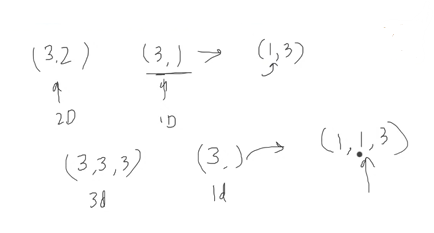

**2. Make each dimension of the two arrays the same size.** 
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised. 

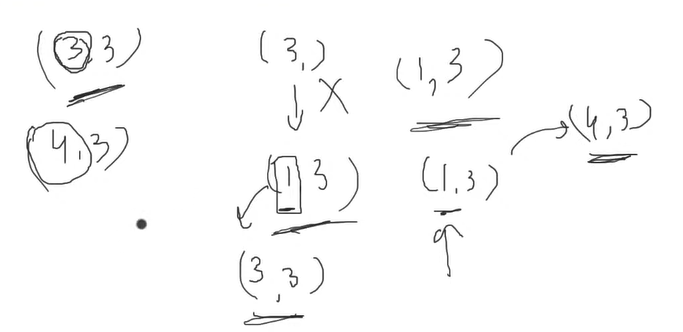

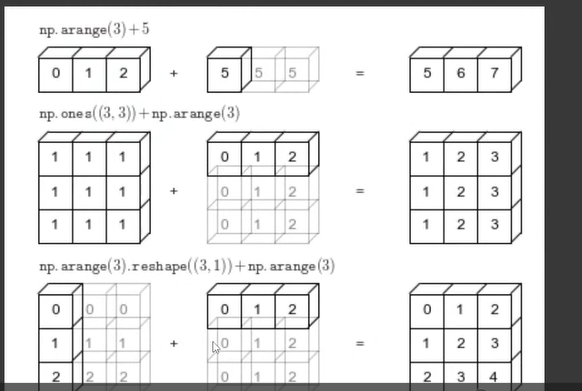

In [39]:
a = np.arange(12).reshape(4,3)
b = np.arange(3)
print(a)
print(b)
print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [40]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)
print(a)
print(b)


#print(a+b) when we do this it will throw error 
#operands could not be broadcast together with shapes (3,4) (3,) 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


In [41]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)
print(a)
print()
print(b)
print()
print(a+b)


[[0 1 2]]

[[0]
 [1]
 [2]]

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [42]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)
print(a)
print()
print(b)
print()
print(a+b)


[[0 1 2]]

[[0]
 [1]
 [2]
 [3]]

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [43]:
a = np.array([1])
b = np.arange(4).reshape(2,2)
print(a)
print()
print(b)
print()
print(a+b)


[1]

[[0 1]
 [2 3]]

[[1 2]
 [3 4]]


In [44]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)
print(a)
print()
print(b)
print()
#print(a+b) there is no one so it should not increase and it will throw error 


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]



In [45]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)
print(a)
print()
print(b)
print()
#print(a+b) there is no one so it should not increase and it will throw error 


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

[[0 1]
 [2 3]]



### Working with mathematical formulas 

In [47]:
a = np.arange(10)
print(a)
np.sum(a)

[0 1 2 3 4 5 6 7 8 9]


45

In [48]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

**sigmoid**

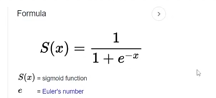


In [50]:
def sigmoid(array):
    return 1/(1+np.exp(-(array)))

a = np.arange(10)
print(a)
sigmoid(a)

[0 1 2 3 4 5 6 7 8 9]


array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

In [51]:
def sigmoid(array):
    return 1/(1+np.exp(-(array)))

a = np.arange(100)
print(a)
sigmoid(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

**mean squared error**

In [53]:
actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)


In [54]:
actual 

array([12,  7, 37, 42, 49, 40, 40, 29, 43, 34, 35, 18, 13,  6, 19,  8, 25,
       21,  9, 10, 41, 44,  5, 29, 40])

In [55]:
predicted

array([13,  9, 19, 36, 37, 30, 17,  1, 21, 28, 37, 21, 13, 11, 15, 40, 35,
       13, 35, 47, 15, 42, 44,  3, 46])

In [56]:
def mse(actual, predicted):
    return np.mean((actual - predicted)**2)
mse(actual, predicted)

345.68

In [57]:
# binary cross entropy

**Working with missing values**

In [59]:
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [60]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

### Plotting Graphs

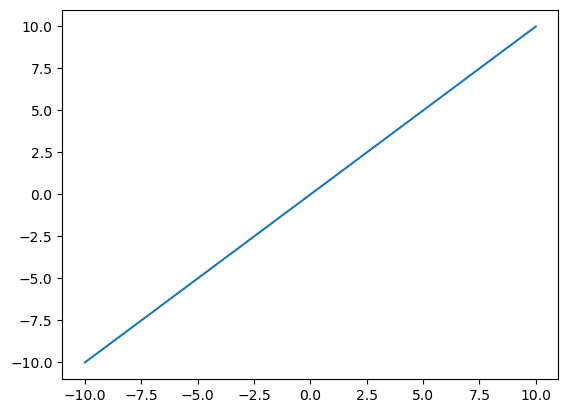

In [62]:
#plotting a 2D plot
# y = x
from matplotlib import pyplot as plt 
x = np.linspace(-10,10,100)
y = x 
plt.plot(x,y)

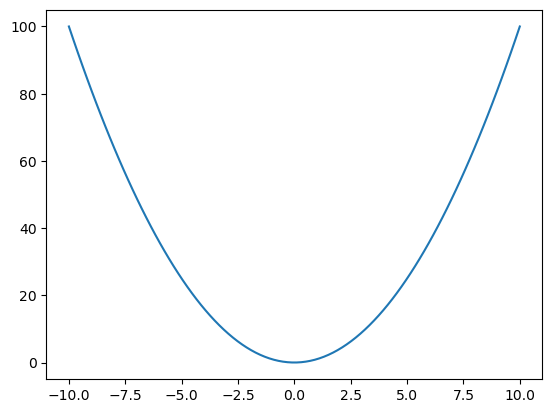

In [63]:
# y = x**2
x = np.linspace(-10,10,100)
y = x**2
plt.plot(x,y)


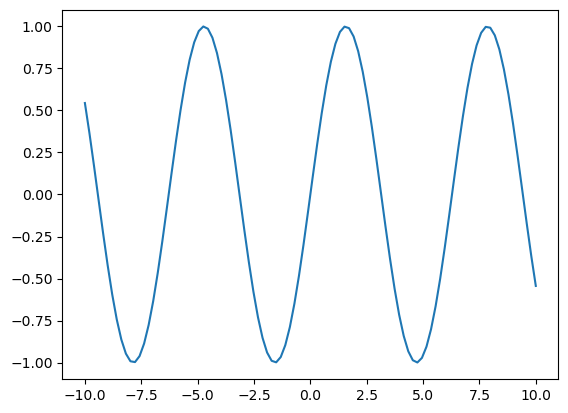

In [64]:
#y = sin(x)
x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y)


C:\Users\User.DESKTOP-8O1CPIG.000\AppData\Local\Temp\ipykernel_17956\1697729587.py:2: RuntimeWarning: invalid value encountered in log
  y = x*(np.log(x))


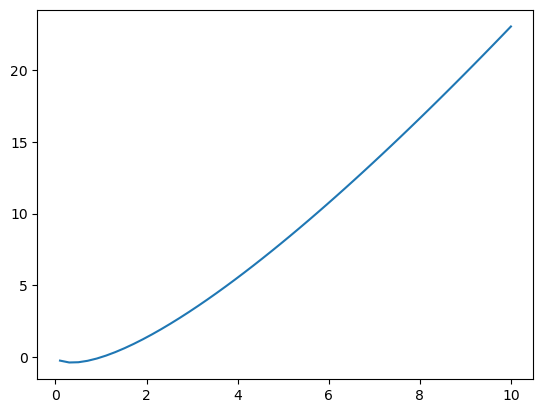

In [65]:
x = np.linspace(-10,10,100)
y = x*(np.log(x))
plt.plot(x,y)


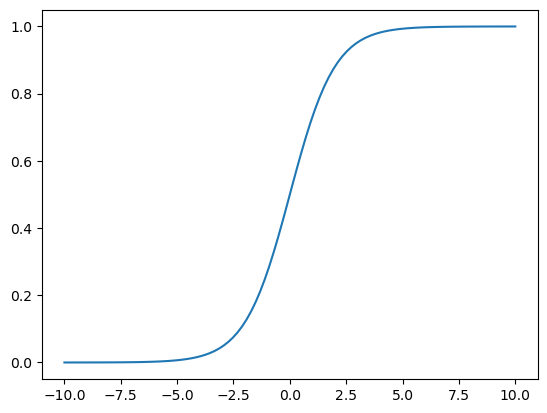

In [66]:
#sigmoid
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))
plt.plot(x,y)
